In [73]:
import pandas as pd

In [74]:
#Read data
df_bookings = pd.read_csv('data/fact_bookings.csv')
df_date = pd.read_csv('data/dim_date.csv')
df_hotels = pd.read_csv('data/dim_hotels.csv')
df_rooms = pd.read_csv('data/dim_rooms.csv')
df_agg_bookings = pd.read_csv('data/fact_aggregated_bookings.csv')

In [75]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [76]:
#The number of rows and columns
df_bookings.shape

(134590, 12)

In [77]:
#Unique room_categories in bookings data
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [78]:
#Unique booking_platforms in bookings data
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [79]:
#count of the booking_platforms
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

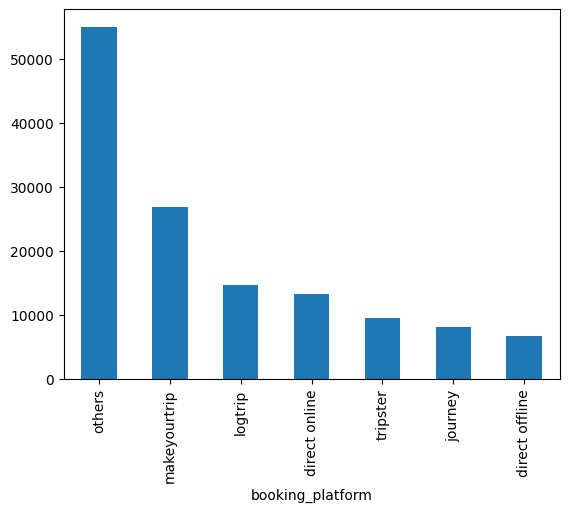

In [80]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

***df_bookings data cleaning***

In [81]:
#quick statistics on the numeric columns in this particular data frame
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [82]:
#checking how many negative values are in the column no_guests
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [83]:
#The number of rows and columns
df_bookings.shape

(134590, 12)

In [84]:
#keeping only positive records
df_bookings = df_bookings[df_bookings.no_guests>0]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [85]:
#Rows number after keeping the positive records
df_bookings.shape

(134578, 12)

In [86]:
#checking the revenue_generated column
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [87]:
#average revenue_generated value and standard deviation
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()
avg, std

(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [88]:
#if the value is more than this it's considered as an outlier
higher_limit = avg + 3*std
higher_limit

np.float64(294498.50173207896)

In [89]:
#if the value is less than this it's considered as an outlier
lower_limit = avg - 3*std
lower_limit

np.float64(-263742.4278567056)

In [90]:
#checking the negative values to detect the lower_limits
df_bookings[df_bookings.revenue_generated<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [91]:
#checking the negative values to detect the higher_limits
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [92]:
#removing outliers
df_bookings = df_bookings[df_bookings.revenue_generated<higher_limit]
df_bookings
#size of the df after outliers have been removed
df_bookings.shape

(134573, 12)

In [93]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [94]:
#handling NA values
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [14]:
#The number of rows and columns
df_hotels.shape

(25, 4)

In [29]:
df_hotels.head(10)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [16]:
#count of the hotels' categories
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [30]:
#the number of hotels in each city
df_hotels.city.value_counts().sort_values()

city
Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: count, dtype: int64

<Axes: xlabel='city'>

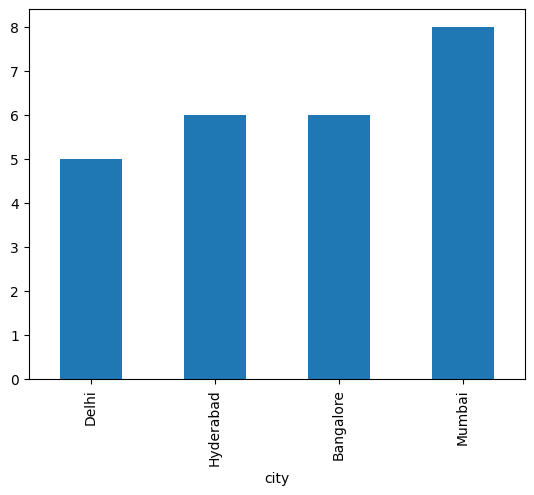

In [33]:
#bar chart of the number of hotels in each city 
df_hotels.city.value_counts().sort_values().plot(kind='bar')

<Axes: ylabel='city'>

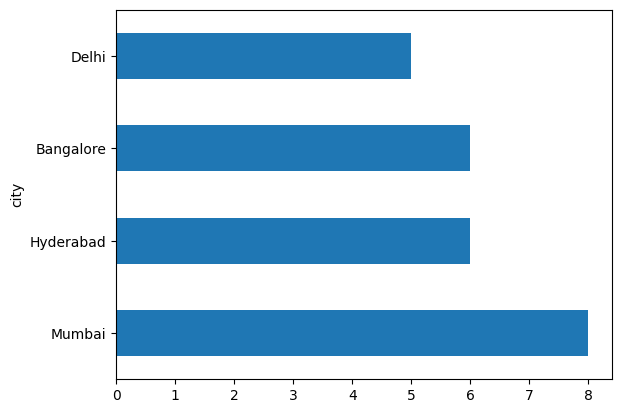

In [18]:
#horizontal bar chart of the number of hotels in each city 
df_hotels.city.value_counts().plot(kind="barh")

In [19]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [22]:
#The number of rows and columns
df_agg_bookings.shape

(9200, 5)

In [34]:
#Unique property_id in agg_bookings data
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [40]:
# Days where bookings exceed capacity
overbooked_days = df_agg_bookings[df_agg_bookings['successful_bookings'] > df_agg_bookings['capacity']]
print(f"Overbooked entries: {overbooked_days}")

Overbooked entries:       property_id check_in_date room_category  successful_bookings  capacity
3           17558      1-May-22           RT1                   30      19.0
12          16563      1-May-22           RT1                  100      41.0
4136        19558     11-Jun-22           RT2                   50      39.0
6209        19560      2-Jul-22           RT1                  123      26.0
8522        19559     25-Jul-22           RT1                   35      24.0
9194        18563     31-Jul-22           RT4                   20      18.0


In [45]:
#Total capacity per property
property_capacity = df_agg_bookings.groupby('property_id')['capacity'].sum().sort_values(ascending=False).reset_index()

print(property_capacity)

    property_id  capacity
0         18559   11776.0
1         17560   11316.0
2         16559   11132.0
3         18562   11132.0
4         16563   10764.0
5         19561   10764.0
6         19563   10120.0
7         18560   10028.0
8         19558    9844.0
9         18561    9844.0
10        17563    9568.0
11        17558    9384.0
12        17559    9292.0
13        19560    9108.0
14        16562    9016.0
15        17564    8924.0
16        18563    8924.0
17        19562    8832.0
18        19559    8740.0
19        16560    8740.0
20        18558    8372.0
21        17561    7794.0
22        17562    7616.0
23        16561    6716.0
24        16558    4784.0


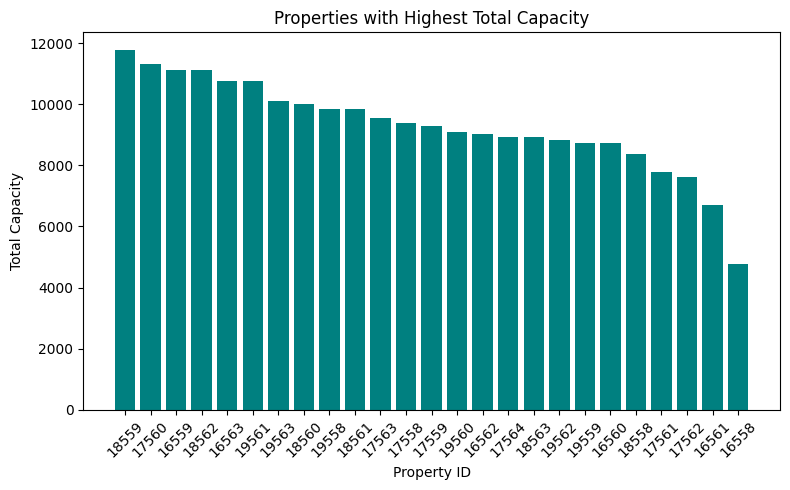

In [46]:
# Plot of total capacity per property
plt.figure(figsize=(8, 5))
plt.bar(property_capacity['property_id'].astype(str), property_capacity['capacity'], color='teal')

plt.title('Properties with Highest Total Capacity')
plt.xlabel('Property ID')
plt.ylabel('Total Capacity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()